# Import Libraries and Configure Matplotlib
Use %matplotlib inline. Import pycircos (Garc, Gcircle), matplotlib.pyplot as plt, re for parsing mutation positions, collections for data aggregation, and matplotlib.cm + matplotlib.colors for colormap mapping.

In [1]:
# Use %matplotlib inline for inline plotting
%matplotlib inline

# Import necessary libraries
import pycircos
import matplotlib.pyplot as plt
import re
import collections
from matplotlib import cm
from matplotlib import colors

# Import specific classes from pycircos
Garc = pycircos.Garc
Gcircle = pycircos.Gcircle

# Initialize Gcircle and Single HER2 Arc (size=263) with Ticks
Create circle = Gcircle(figsize=(8,8)). Add a single Garc with arc_id='HER2', size=263, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True. circle.add_garc(arc). Call circle.set_garcs(-65,245). Add tick marks with circle.tickplot('HER2', raxis_range=(985,1000), tickinterval=20, ticklabels=None) to help navigate positions.

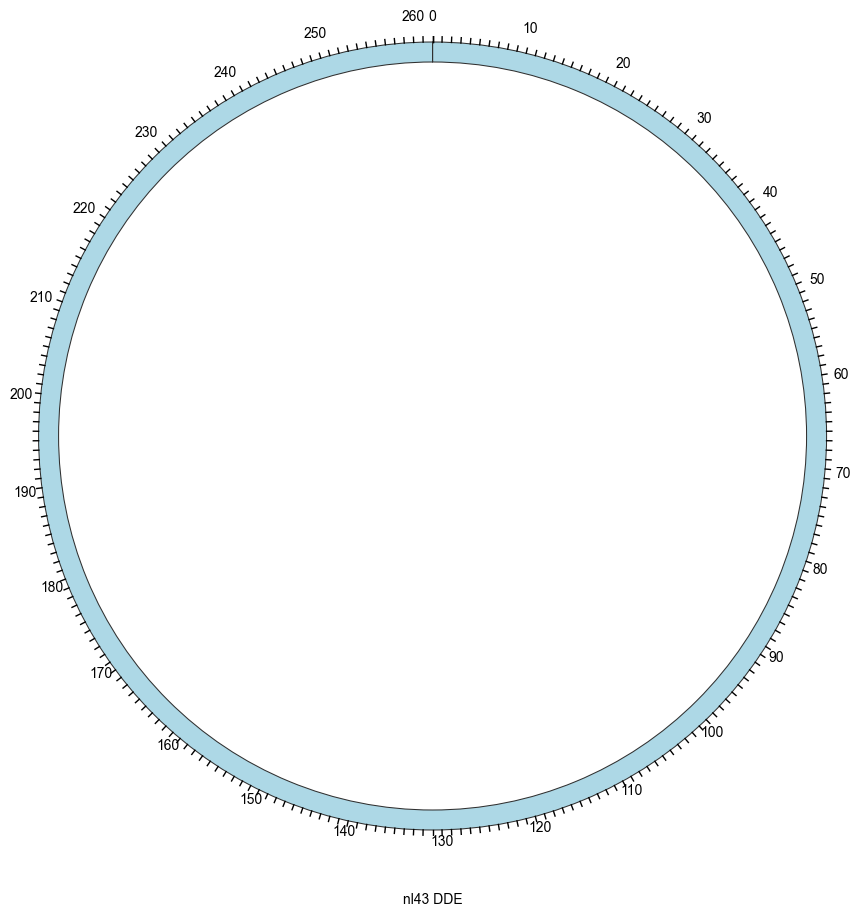

In [2]:
# Initialize Gcircle and Single HER2 Arc (size=263) with Ticks

# Create a Gcircle object with specified figure size
circle = Gcircle(figsize=(8, 8))

# Add a single Garc for HER2 with specified parameters
arc = Garc(
    arc_id='nl43 DDE',
    size=263,
    interspace=0,
    raxis_range=(935, 985),
    labelposition=200,
    label_visible=True,
    facecolor='lightblue'  # Set arc color to light blue
)
circle.add_garc(arc)

# Set the arcs with start at 0 degrees and end at 360 degrees
circle.set_garcs(0, 360)

# Add tick marks to the HER2 arc for navigation
circle.tickplot(
    'nl43 DDE',
    raxis_range=(985, 1030),
    tickinterval=1,
    # ticklabels=[str(i) if i % 10 == 0 else '' for i in range(1, 264)],
    ticklabels=[str(i) if i % 10 == 0 else '' for i in range(0, 264)],
    tickcolor='black'  # Set tick color to blue
)

# Load and Parse kn.her2.all (two mutations per row, ddE in second column)
Open the data file (e.g., 'data/kn.her2.all'). For each non-empty line, split into columns (handle comma, tab, or space). The first column contains two mutations; extract two integer residue positions using regex (e.g., digits in tokens like L755S or 755). Convert to 1-based integers p1, p2 (clip to [1,263]). Parse ddE = float(second column). Accumulate: pairs.append((p1,p2,ddE)) and values_all for min/max.

In [3]:
# Load and Parse kn.her2.all (two mutations per row, ddE in second column)

# Initialize a list to store mutation pairs and their ddE values
pairs = []
values_all = []

# Open and parse the data file
with open('kn.her2.all') as f:
    for line in f:
        line = line.strip()
        if not line:  # Skip empty lines
            continue
        
        # Split the line into columns (handle comma, tab, or space as delimiters)
        columns = re.split(r'[,\t\s]+', line)
        
        # Extract the first column (two mutations) and second column (ddE)
        mutations = columns[0]
        ddE = float(columns[1])
        
        # Use regex to extract residue positions from mutation strings
        positions = [int(pos) for pos in re.findall(r'\d+', mutations)]
        
        # Ensure exactly two positions are extracted
        if len(positions) != 2:
            continue
        
        # Convert to 1-based integers and clip to [1, 263]
        p1 = max(1, min(263, positions[0]))
        p2 = max(1, min(263, positions[1]))
        
        # Accumulate the pair and ddE value
        pairs.append((p1, p2, ddE))
        values_all.append(ddE)

        # Filter pairs with ddE > 3.5
filtered_pairs_background = [(p1, p2, ddE) for p1, p2, ddE in pairs if (ddE > 2.5 and ddE <=3.5)]
filtered_pairs_significant = [(p1, p2, ddE) for p1, p2, ddE in pairs if ddE > 3.5]
# Calculate the minimum and maximum ddE values for later use
vmin_background, vmax_background = min(ddE for _, _, ddE in filtered_pairs_background), max(ddE for _, _, ddE in filtered_pairs_background)
vmin_significant, vmax_significant = min(ddE for _, _, ddE in filtered_pairs_significant), max(ddE for _, _, ddE in filtered_pairs_significant)

In [4]:
# filtered_pairs

# build DE scatter plots
read in kn.her2.all again, creat scatter plot ring with raxis 760 to 915. for all single delta Es, thats in column index 3 and 4 of the file, read in and store the values for each position for example in position 1: A1B, B2C... etc, plot the values on the ring with blue indicate negative and red indicate positive, which center the middle of the r axis(0): middle = (760 + 915) / 2,  for each position its scattered in one axis towards center of circle (more towards center the more red and positive )

scatter plot reference:

#scatter plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("sample_data/example_data_point.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(845,925), facecolor="orangered", spine=True) 

In [5]:
# Re-read the file and process single delta Es for scatter plot
scatter_data = collections.defaultdict(list)

with open('kn.her2.all') as f:
    for line in f:
        line = line.strip()
        if not line:  # Skip empty lines
            continue
        
        # Split the line into columns (handle comma, tab, or space as delimiters)
        columns = re.split(r'[,\t\s]+', line)
        
        # Extract positions and delta Es from columns 3 and 4
        try:
            pos1, pos2 = [int(pos) for pos in re.findall(r'\d+', columns[0])]
            delta_e1 = float(columns[2])
            delta_e2 = float(columns[3])
        except (IndexError, ValueError):
            continue
        
        # Clip positions to [1, 263] and store delta Es
        pos1 = max(1, min(263, pos1))
        pos2 = max(1, min(263, pos2))
        scatter_data[pos1].append(delta_e1)
        scatter_data[pos2].append(delta_e2)

# Prepare data for scatter plot
positions = []
values = []
for pos, deltas in scatter_data.items():
    for delta in deltas:
        positions.append(pos - 1)  # Convert to 0-based index
        values.append(delta)  # Plot every delta E individually

# Normalize values for color mapping
norm = colors.Normalize(vmin=min(values), vmax=max(values))
cmap = cm.coolwarm  # Use a diverging colormap (blue for negative, red for positive)

# Plot the scatter plot on the ring
vmin, vmax = min(values), max(values)
# Plot the scatter plot on the ring
circle.scatterplot(
    'nl43 DDE',
    data=values,
    positions=positions,
    rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
    raxis_range=(760, 915),
    facecolor=[cmap(norm(value)) for value in values],
    spine=False
)

# Calculate the average delta E for each position
average_values = [sum(deltas) / len(deltas) for deltas in scatter_data.values()]
average_positions = [pos - 1 for pos in scatter_data.keys()]  # Convert to 0-based index

# Draw average delta E values with a line plot
circle.lineplot(
    'nl43 DDE',
    data=average_values,
    positions=average_positions,
    rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
    raxis_range=(760, 915),
    linecolor="royalblue",
    spine=False
)

# Draw a dashed midline between 760 and 915
midline_radius = (760 + 915) / 2  # Calculate the middle of the r-axis range
circle.ax.plot(
    [0, 1],  # x-coordinates (normalized to the circle's axes)
    [midline_radius, midline_radius],  # y-coordinates for the midline
    transform=circle.ax.transAxes,  # Use the circle's axis transformation
    linestyle='--',  # Dashed line style
    color='gray',  # Line color
    linewidth=1  # Line width
)

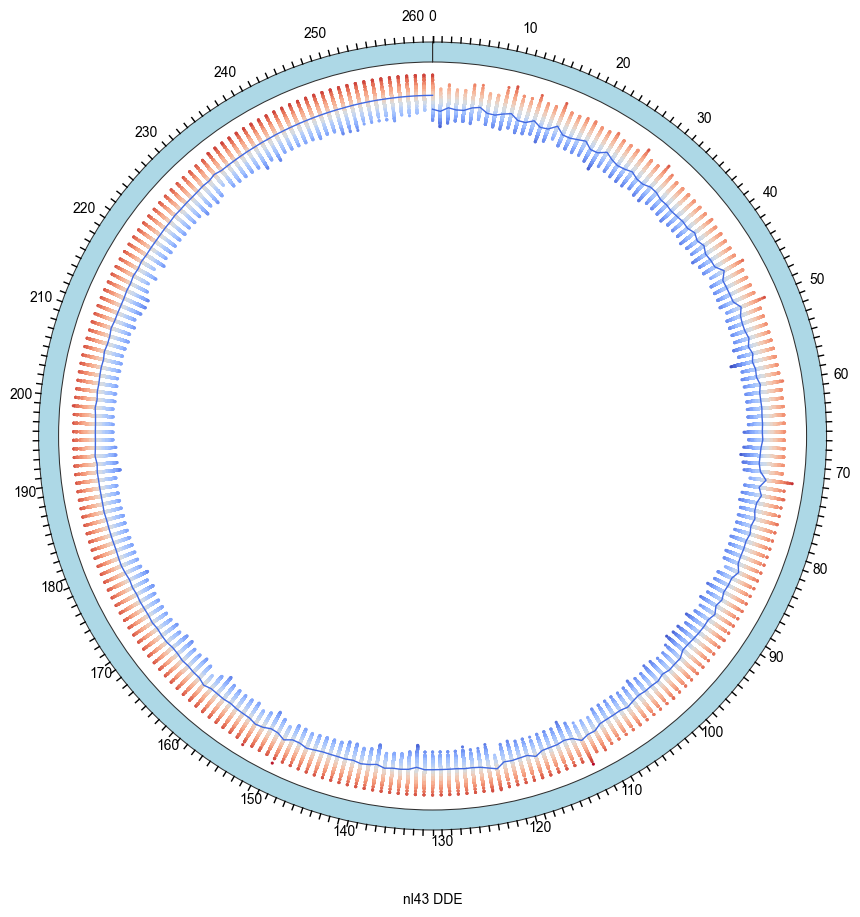

In [6]:
circle.figure

In [7]:
# # Prepare positions and data for scatter plot
# positions = [i - 1 for i in range(1, 264)]  # 0-based positions for all 263 residues
# data = [1] * 263  # Uniform data for all residues

# # Plot the scatter plot on the HER2 arc
# circle.scatterplot(
#     'nl43 DDE',
#     data=data,
#     positions=positions,
#     rlim=[0, 1.1],
#     raxis_range=(800, 915),
#     facecolor='dimgray',
#     spine=True
# )

# Map ddE to Colors and Draw Link Track (chords between residue pairs)
Compute vmin, vmax = min(values_all), max(values_all). Create a Normalize(vmin, vmax) and a colormap (e.g., plt.cm.coolwarm). For each (p1,p2,ddE): build source=('HER2', p1-1, p1, 845) and destination=('HER2', p2-1, p2, 845), then circle.chord_plot(source, destination, facecolor=cmap(norm(ddE))). Optionally add a colorbar: mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap); mappable.set_array([]); plt.colorbar(mappable, fraction=0.035, pad=0.02, label='ddE').

In [8]:
# Map ddE to a single color and draw link track (chords between residue pairs)

# Define a single color for the background chords
background_color = 'lightgray'

# Iterate through each mutation pair in the background
for p1, p2, ddE in filtered_pairs_background:
    # Define the source and destination for the chord plot
    source = ('nl43 DDE', p1 - 1, p1, 740)
    destination = ('nl43 DDE', p2 - 1, p2, 740)
    
    # Plot the chord with the specified background color
    circle.chord_plot(source, destination, facecolor=background_color)


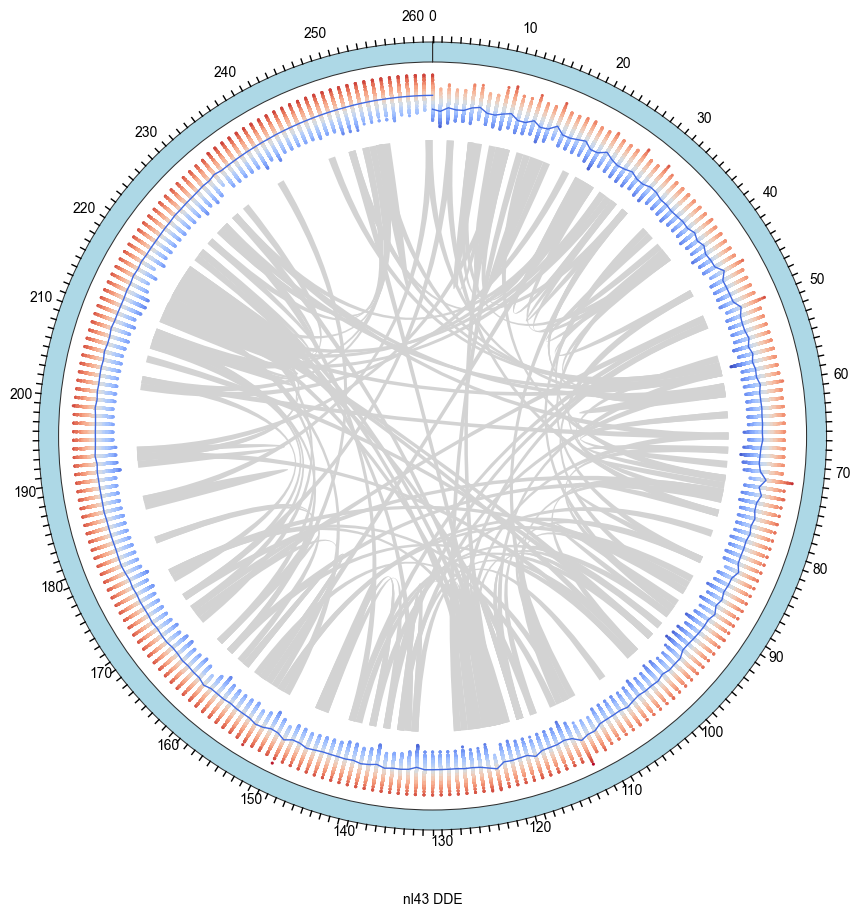

In [9]:
# Render and Save Figure
circle.figure  # Display the figure in the notebook output pane

/var/folders/17/rj19bvws2qscyfjmb7m44zmm0000gn/T/ipykernel_48672/2354944118.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable_significant, fraction=0.035, pad=0.02, label='Significant ddE')


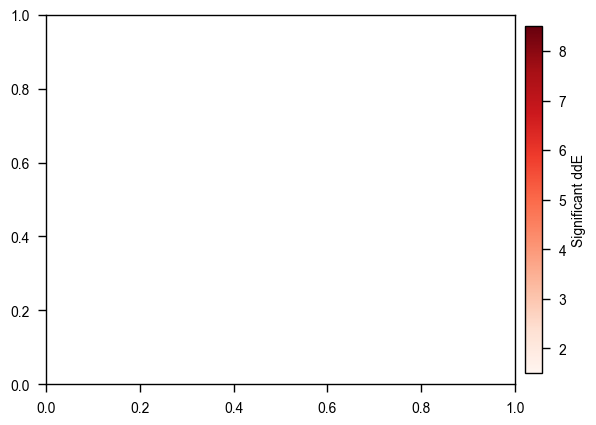

In [10]:
# Create a normalization object and colormap for significant ddE values
norm_significant = colors.Normalize(vmin=1.5, vmax=vmax_significant)
cmap_significant = cm.Reds  # Use the 'Reds' colormap for a more red appearance

# Iterate through each significant mutation pair and ddE value
for p1, p2, ddE in filtered_pairs_significant:
    # Define the source and destination for the chord plot
    source = ('nl43 DDE', p1 - 1, p1, 740)
    destination = ('nl43 DDE', p2 - 1, p2, 740)
    
    # Plot the chord with a color mapped to the ddE value
    circle.chord_plot(source, destination, facecolor=cmap_significant(norm_significant(ddE)))
    # print(cmap_significant(norm_significant(ddE)))
# Optionally add a colorbar for significant connections
mappable_significant = cm.ScalarMappable(norm=norm_significant, cmap=cmap_significant)
mappable_significant.set_array([])
plt.colorbar(mappable_significant, fraction=0.035, pad=0.02, label='Significant ddE')

In [11]:
# Add legend to the bottom-right corner of the circle plot
tag_x = 0.999  # Move further to the right
tag_y_start = 0.001  # Move further down
tag_y_step = 0.03  # Adjust step size for better spacing

# Define the tags for the legend
tags = [
    (background_color, f'Background ddE (grey): {vmin_background:.2f} - {vmax_background:.2f}'),
    (cmap_significant(norm_significant(vmax_significant)), f'Significant ddE (red): {vmin_significant:.2f} - {vmax_significant:.2f}')
]

# Add each tag to the plot
for i, (color, label) in enumerate(tags):
    tag_y = tag_y_start + i * tag_y_step
    # Combine both tags into a single legend box
    legend_text = '\n'.join([f'{label}' for _, label in tags])
    circle.figure.text(
        tag_x, tag_y_start, legend_text, color='black', ha='right', va='bottom', fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')  # Add a black frame
    )

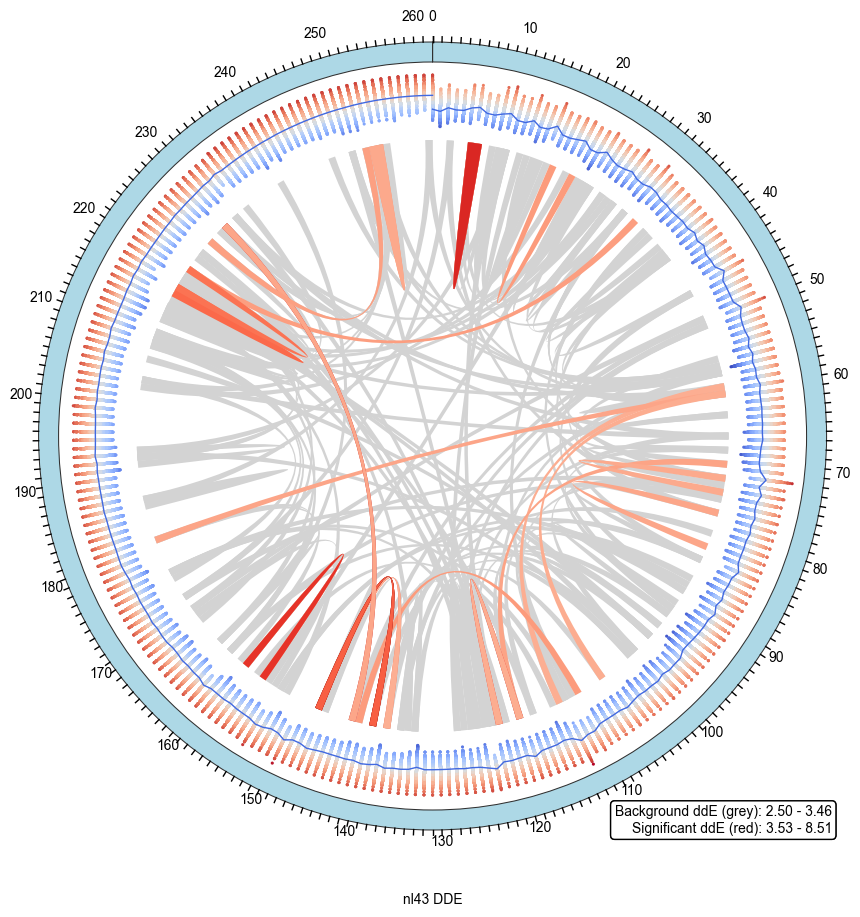

In [12]:
circle.figure

# Render and Save Figure
Display with circle.figure. Save to disk with circle.figure.savefig('her2_ddE_links.png', dpi=300, bbox_inches='tight') and optionally PDF. In VS Code, view in the Notebook output pane or open the saved file from the Explorer.

In [13]:
# Render and Save Figure
circle.figure  # Display the figure in the notebook output pane

# Save the figure as a PNG file with high resolution
circle.figure.savefig('nl43_ddE_links.png', dpi=300, bbox_inches='tight')
# Optionally save the figure as a PDF file
circle.figure.savefig('nl43_ddE_links.pdf', dpi=300, bbox_inches='tight')